## 1. Introdução

####**Objetivo**
Desenvolver modelo de Machine Learning (ML) para predição de obesidade - indica se uma pessoa tem obesidade a partir de dados relacionados a suas características físicas e seus hábitos.

####**Critério**
O modelo deve ter assertividade acima de 75%. No projeto, esse critério será traduzido para as seguites métricas de modelos de classificação:
- acurácia acima de 75%
- precisão (*precision*) acima de 75%
- recall acima de 75%

####**Modelos de Machine Learning**
Para o projeto, dois modelos serão testados: KNN e Árvore de Decisão (*Decision Tree*). Os modelos foram escolhidos por apresentarem métodos de resolução diferentes e serem de mais facilmente interpretados do que modelos mais complexos/arrojados.

####**Conjunto de Dados**
Para desenvolvimento do modelo, será usado o conjunto de dados "Obesity.csv". Os dados são os seguintes:

Coluna (Feature)|  Descrição |
------- | -----------|
Gender |  Gênero|
Age| Idade|
Height|Altura (m)|
Weight|Peso (kg)|
family_history|Algum membro da família sofreu ou sofre de excesso de peso?|
FAVC|Você come alimentos altamente calóricos com frequência?
FCVC|Você costuma comer vegetais nas suas refeições?
NCP|Quantas refeições principais você faz diariamente?
CAEC|Você come alguma coisa entre as refeições?
SMOKE|Você fuma?
CH2O|Quanta água você bebe diariamente?
SCC|Você monitora as calorias que ingere diariamente?
FAF|Com que frequência você pratica atividade física?
TUE|Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
CALC|Com que frequência você bebe álcool?
MTRANS|Qual meio de transporte você costuma usar?
Obesity_level (coluna alvo)|Nível de obesidade

##2. Conhecendo o Conjunto de Dados

### 2.1 Importando bibliotecas e o conjunto de dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np

# Conjuntos de Treino e Teste
from sklearn.model_selection import train_test_split

# Normalização de Variáveis Numéricas
from sklearn.preprocessing import MinMaxScaler

# Otimização de Hiperparâmetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Modelos Supervisionados de Classificação
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Métricas de Avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [4]:
df = pd.read_csv('/content/Obesity.csv', sep = ',')
df.head(3)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


### 2.2 Conhecendo os dados

In [5]:
dicioColunas = {
    'Gender': 'genero',
    'Age': 'idade',
    'Height': 'altura',
    'Weight': 'peso',
    'family_history': 'hist_fam',
    'FAVC': 'freq_cons_ali_alt_cal',
    'FCVC': 'freq_cons_veg',
    'NCP': 'num_ref',
    'CAEC': 'come_entre_ref',
    'SMOKE': 'fuma',
    'CH2O': 'cons_h2o',
    'SCC': 'monit_cal',
    'TUE': 'tempo_tela',
    'FAF': 'freq_ativ_fis',
    'CALC': 'freq_cons_alcool',
    'MTRANS': 'meio_transp',
    'Obesity': 'obesidade'
}
df.rename(columns = dicioColunas, inplace = True)
df.head(2)

,genero,idade,altura,peso,hist_fam,freq_cons_ali_alt_cal,freq_cons_veg,num_ref,come_entre_ref,fuma,cons_h2o,monit_cal,freq_ativ_fis,tempo_tela,freq_cons_alcool,meio_transp,obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   genero                 2111 non-null   object 
 1   idade                  2111 non-null   float64
 2   altura                 2111 non-null   float64
 3   peso                   2111 non-null   float64
 4   hist_fam               2111 non-null   object 
 5   freq_cons_ali_alt_cal  2111 non-null   object 
 6   freq_cons_veg          2111 non-null   float64
 7   num_ref                2111 non-null   float64
 8   come_entre_ref         2111 non-null   object 
 9   fuma                   2111 non-null   object 
 10  cons_h2o               2111 non-null   float64
 11  monit_cal              2111 non-null   object 
 12  freq_ativ_fis          2111 non-null   float64
 13  tempo_tela             2111 non-null   float64
 14  freq_cons_alcool       2111 non-null   object 
 15  meio

<font size=2>Primeiras impressões:
- não há dados nulos.
- algumas colunas com nomes semelhantes possuem tipos diferentes > possível tratamento</font>

In [7]:
for coluna in df.columns:
  if type(df[coluna][0]) == str:
    print(df[coluna].value_counts())
    print('---')

genero
Male      1068
Female    1043
Name: count, dtype: int64
---
hist_fam
yes    1726
no      385
Name: count, dtype: int64
---
freq_cons_ali_alt_cal
yes    1866
no      245
Name: count, dtype: int64
---
come_entre_ref
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
---
fuma
no     2067
yes      44
Name: count, dtype: int64
---
monit_cal
no     2015
yes      96
Name: count, dtype: int64
---
freq_cons_alcool
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
---
meio_transp
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
---
obesidade
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
---


<font size=2>Todas as colunas com tipos "object" (texto) são categóricas. São elas:</font><br>
<br>

Coluna|Tipo|
---|---|
genero|binária|
hist_fam|binária|
freq_cons_ali_alt_cal|binária|
come_entre_ref|multi ordenada|
fuma|binária|
monit_cal|binária|
freq_cons_alcool|multi ordenada|
meio_transp|multi não ordenada|
obesidade|multi ordenada|

<br>

<font size=2>Outro ponto relevante é a quantidade de categorias na variável alvo ("obesidade"). Ela contém 7 categorias que podem ser agrupadas em 4 grupos, onde as variações dentro de um grupo indicam um grau de:
- 1 para "peso insuficiente" ou "abaixo do peso recomendado"
- 1 para "peso recomendado"
- 2 para "sobrepeso"
- 3 para "obesidade"</font>


In [8]:
df.describe()

,idade,altura,peso,freq_cons_veg,num_ref,cons_h2o,freq_ativ_fis,tempo_tela
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<font size=2>
- as colunas numéricas contém dados em diferentes escalas.<br>
- as colunas "idade", "altura" e "peso", mais intuitivas, não parecem possuir dados estranhos<br>
- as demais colunas, que avaliam hábitos, estão em escala mais próxima (mas não igual), de modo que o valor nelas pode indicar um maior ou menor grau de realização daquele hábito (ser mais ou menos frequente)

##3. Análise Exploratória

####3.1 Adicionando Coluna Alvo Agrupada

<font size = 2>Anteriormente, vimos que a coluna alvo ("obesidade") pode ser agrupada em 4 conjuntos. Vamos adicionar a coluna "gp_obesidade" com esses grupos

In [9]:
dicioObesidade = {
    'Insufficient_Weight': 'abaixo',
    'Normal_Weight': 'normal',
    'Overweight_Level_I': 'sobrepeso',
    'Overweight_Level_II': 'sobrepeso',
    'Obesity_Type_I': 'obesidade',
    'Obesity_Type_II': 'obesidade',
    'Obesity_Type_III': 'obesidade'
}
df['gp_obesidade'] = df.obesidade.map(dicioObesidade)
df.head(3)

,genero,idade,altura,peso,hist_fam,freq_cons_ali_alt_cal,freq_cons_veg,num_ref,come_entre_ref,fuma,cons_h2o,monit_cal,freq_ativ_fis,tempo_tela,freq_cons_alcool,meio_transp,obesidade,gp_obesidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,normal


In [10]:
ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade':4}
df['ordem'] = df.gp_obesidade.map(ordem)
ordemClasse = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['ordemInd'] = df.obesidade.map(ordemClasse)
df = df.sort_values(by = ['ordemInd', 'ordem'])
df = df.reset_index(drop = True)

In [11]:
df.gp_obesidade.value_counts(normalize = True)*100

,proportion
gp_obesidade,
obesidade,46.044529
sobrepeso,27.475130
normal,13.595452
abaixo,12.884889


<font size=2>A partir da coluna agrupada, vemos que quase metade (46%) do conjunto é de casos indicados com algum grau de obesidade

####3.2 Obesidade e Gênero

In [12]:
df.genero.value_counts(normalize = True)*100

,proportion
genero,
Male,50.592136
Female,49.407864


In [13]:
print('Homens')
print(df[df.genero == 'Male'].gp_obesidade.value_counts(normalize = True)*100)
print('---')
print('Mulheres')
print(df[df.genero == 'Female'].gp_obesidade.value_counts(normalize = True)*100)

Homens
gp_obesidade
obesidade    45.973783
sobrepeso    31.086142
normal       13.670412
abaixo        9.269663
Name: proportion, dtype: float64
---
Mulheres
gp_obesidade
obesidade    46.116970
sobrepeso    23.777565
abaixo       16.586769
normal       13.518696
Name: proportion, dtype: float64


<font size=2>A distribuição de gênero no conjunto é praticamente a mesma, assim como a proporção de casos de obesidade entre os gêneros.

####3.3 Obesidade, Altura e Peso

<font size=2>Com as informações de altura e peso, pode-se calcular o IMC (índice de Massa Corporal), que é uma medida utilizada para classificar se uma pessoa está com o peso ideal.

In [14]:
df['imc'] = df['peso'] / (df['altura']*df['altura'])
df.head(2)

,genero,idade,altura,peso,hist_fam,freq_cons_ali_alt_cal,freq_cons_veg,num_ref,come_entre_ref,fuma,...,monit_cal,freq_ativ_fis,tempo_tela,freq_cons_alcool,meio_transp,obesidade,gp_obesidade,ordem,ordemInd,imc
0,Male,20.0,1.76,55.0,yes,yes,2.0,4.0,Sometimes,no,...,no,2.0,2.0,no,Public_Transportation,Insufficient_Weight,abaixo,1,1,17.755682
1,Female,22.0,1.67,50.0,yes,no,3.0,3.0,no,no,...,yes,2.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight,abaixo,1,1,17.928215


In [15]:
n_bins = 1 + np.log2(len(df))
n_bins = int(n_bins)

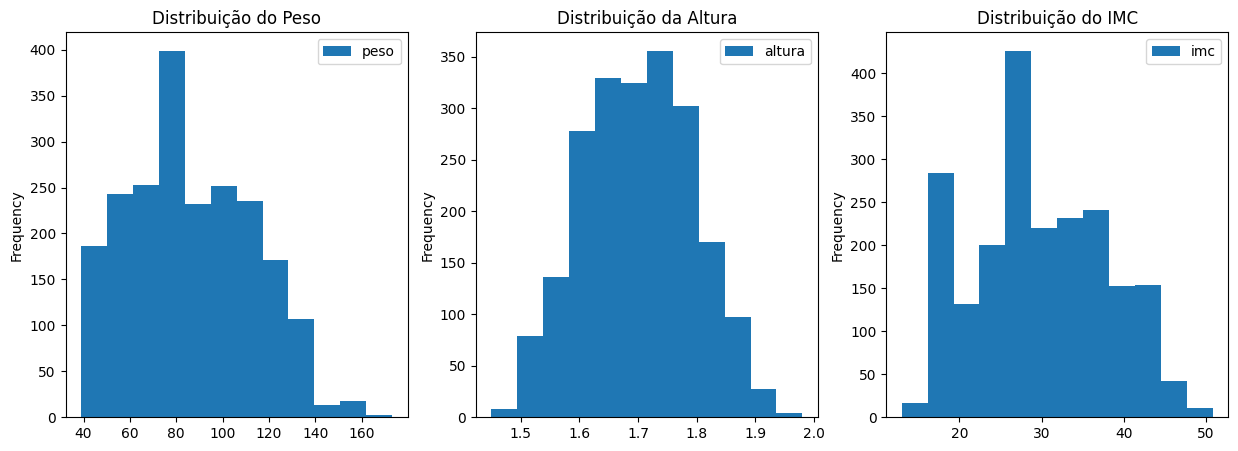

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

df.plot.hist(y = 'peso', bins = n_bins, ax = axs[0])
axs[0].set_title('Distribuição do Peso')

df.plot.hist(y = 'altura', bins = n_bins, ax = axs[1])
axs[1].set_title('Distribuição da Altura')

df.plot.hist(y = 'imc', bins = n_bins, ax = axs[2])
axs[2].set_title('Distribuição do IMC')

plt.show()

<font size=2>Os dados seguem escalas diferentes, o que pode indicar a necessidade de normalização dependendo do modelo.
<br>A variável "altura" guarda semelhança com uma curva de cino, associada à distribuição normal. Já "peso" e "imc" tem distribuições diferentes

/tmp/ipython-input-17-1898376804.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(fontsize=8)


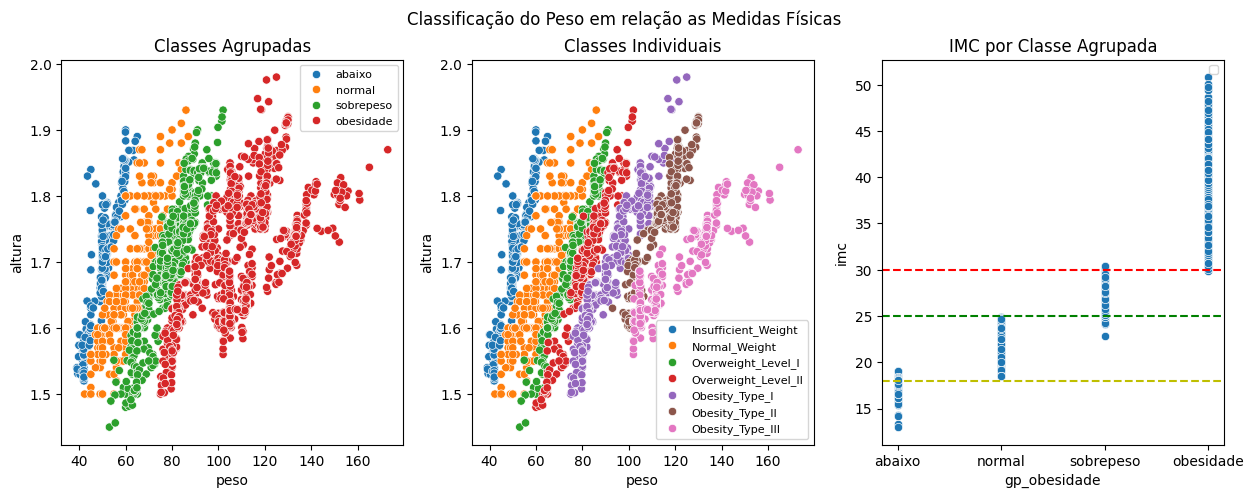

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Classificação do Peso em relação as Medidas Físicas')

sns.scatterplot(data = df, x = 'peso', y = 'altura', hue = 'gp_obesidade', ax = axs[0])
axs[0].set_title('Classes Agrupadas')
axs[0].legend(fontsize=8)

sns.scatterplot(data = df, x = 'peso', y = 'altura', hue = 'obesidade', ax = axs[1])
axs[1].set_title('Classes Individuais')
axs[1].legend(fontsize=8)

sns.scatterplot(data = df, x = 'gp_obesidade', y = 'imc', ax = axs[2])
plt.axhline(y = 18, color = 'y', linestyle = '--')
plt.axhline(y = 25, color = 'g', linestyle = '--')
plt.axhline(y = 30, color = 'r', linestyle = '--')
axs[2].set_title('IMC por Classe Agrupada')
axs[2].legend(fontsize=8)

plt.show()

<font size=2>Os gráficos acima indicam haver uma relação significativa entre as medidas físicas (altura, peso e imc) e as classificações quanto ao peso.
<br>
Em todos os gráficos, a separação entre as classes é visivelmente perceptível.
<br>
No último gráfico, as linhas horizontais pontilhadas indicam os limites usados para classificar o IMC, sendo:
- abaixo de 18: abaixo do recomendado
- entre 18 e 25: recomendado
- entre 25 e 30: sobrepeso
- acima de 30: obedidade
<br>
Percebe-se que as linhas de referência estão alinhadas com os limites dos grupos.</font>

####3.4 Hábitos Alimentares e Obesidade

#####3.4.1 Histórico Familiar

In [18]:
df_hf = df[['hist_fam', 'gp_obesidade']].drop_duplicates()
df_hf = df_hf.reset_index(drop = True)
df_hf['contagem'] = df_hf.apply(lambda x: df[(df.hist_fam == x.hist_fam) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_hf.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_hf[df_hf['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_hf['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_hf['ordem'] = df_hf.gp_obesidade.map(dicio_ordem)

df_hf = df_hf.sort_values(by = ['ordem', 'hist_fam'], ascending = [True, False])

/tmp/ipython-input-19-4108697485.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


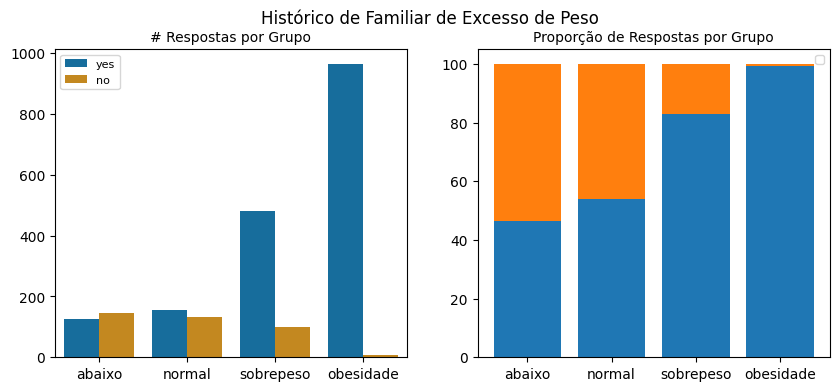

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Histórico de Familiar de Excesso de Peso')

sns.set_palette('colorblind')
sns.barplot(data = df_hf, hue = 'hist_fam', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)


x = list(df_hf['gp_obesidade'].unique())
y_no = df_hf[df_hf['hist_fam'] == 'no']['percentual'].values
y_yes = df_hf[df_hf['hist_fam'] == 'yes']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_yes)
plt.bar(x = x, height = y_no, bottom = y_yes)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

**Pontuando**<br>
A ocorrência de histórico de excesso de peso na família é crescente entre as classes. É uma variável que pode apresentar alguma capacidade de predição para casos de obesidade. Pela proporção de ocorrência entre as classes, seria quase uma condição "necessária, mas não suficiente" para a indicação de obesidade.

#####3.4.2 Consumo de Alimentos Altamente Calóricos

In [20]:
df_fcaac = df[['freq_cons_ali_alt_cal', 'gp_obesidade']].drop_duplicates()
df_fcaac = df_fcaac.reset_index(drop = True)
df_fcaac['contagem'] = df_fcaac.apply(lambda x: df[(df.freq_cons_ali_alt_cal == x.freq_cons_ali_alt_cal) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_fcaac.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_fcaac[df_fcaac['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_fcaac['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_fcaac['ordem'] = df_fcaac.gp_obesidade.map(dicio_ordem)

df_fcaac = df_fcaac.sort_values(by = ['ordem', 'freq_cons_ali_alt_cal'], ascending = [True, False])

/tmp/ipython-input-21-228478016.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


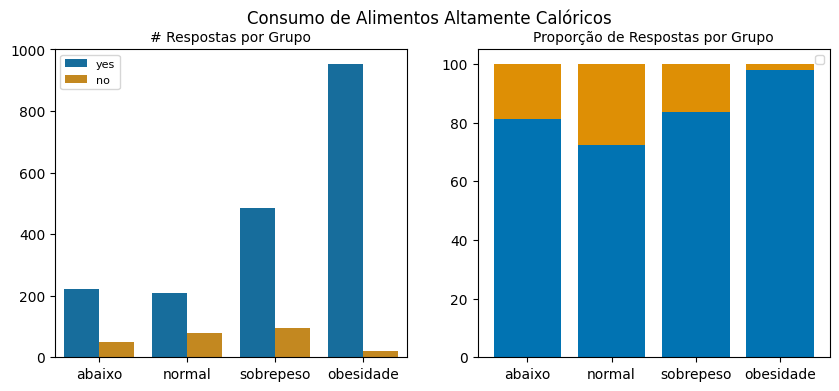

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Consumo de Alimentos Altamente Calóricos')

sns.set_palette('colorblind')
sns.barplot(data = df_fcaac, hue = 'freq_cons_ali_alt_cal', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)


x = list(df_fcaac['gp_obesidade'].unique())
y_no = df_fcaac[df_fcaac['freq_cons_ali_alt_cal'] == 'no']['percentual'].values
y_yes = df_fcaac[df_fcaac['freq_cons_ali_alt_cal'] == 'yes']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_yes)
plt.bar(x = x, height = y_no, bottom = y_yes)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

In [22]:
df_fcaac[(df_fcaac['freq_cons_ali_alt_cal'] == 'yes')]

,freq_cons_ali_alt_cal,gp_obesidade,contagem,percentual,ordem
0,yes,abaixo,221,81.250000,1
3,yes,normal,208,72.473868,2
5,yes,sobrepeso,484,83.448276,3
6,yes,obesidade,953,98.045267,4


**Pontuando**<br>O consumo de alimentos altamente calóricos pode ser um indicativo de obesidade, mas não parece ser um aspecto determinante. Essa ponderação é decorrente deste ser um hábito com frequência alta (superior a 70%) em todos os grupos, especialmente no grupo "obesidade", onde 98% praticam este hábito.

#####3.4.3 Come Entre Refeições

In [23]:
df_cer = df[['come_entre_ref', 'gp_obesidade']].drop_duplicates()
df_cer = df_cer.reset_index(drop = True)
df_cer['contagem'] = df_cer.apply(lambda x: df[(df.come_entre_ref == x.come_entre_ref) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_cer.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_cer[df_cer['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_cer['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_cer['ordem'] = df_cer.gp_obesidade.map(dicio_ordem)

df_cer = df_cer.sort_values(by = ['ordem', 'come_entre_ref'], ascending = [True, False])
df_cer = df_cer.reset_index(drop = True)

/tmp/ipython-input-24-4184179170.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


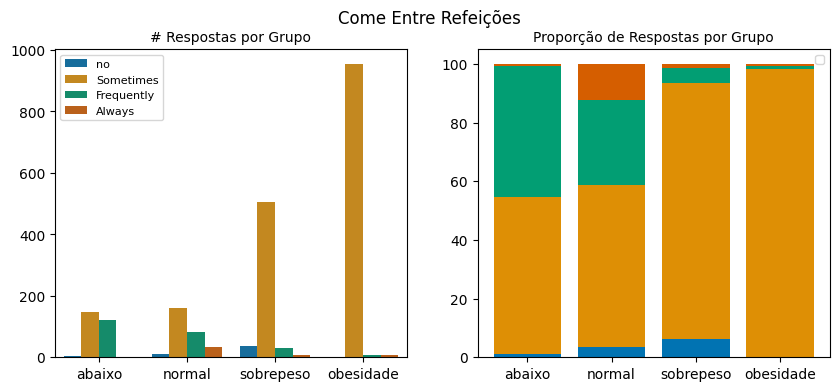

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Come Entre Refeições')

sns.set_palette('colorblind')
sns.barplot(data = df_cer, hue = 'come_entre_ref', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)


x = list(df_cer['gp_obesidade'].unique())
y_no = df_cer[df_cer['come_entre_ref'] == 'no']['percentual'].values
y_sometimes = df_cer[df_cer['come_entre_ref'] == 'Sometimes']['percentual'].values
y_freq = df_cer[df_cer['come_entre_ref'] == 'Frequently']['percentual'].values
y_always = df_cer[df_cer['come_entre_ref'] == 'Always']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_no)
plt.bar(x = x, height = y_sometimes, bottom = y_no)
plt.bar(x = x, height = y_freq, bottom = y_no+y_sometimes)
plt.bar(x = x, height = y_always, bottom = y_no+y_sometimes+y_freq)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

**Pontuando**<br>Comer entre as refeições não parece ser um hábito determinante para identificar um caso de obesidade, pois a expectativa inicial é de que pessoas obesas comeriam mais (maior frequência, entre as refeições). No entanto, pessoas não obesas indicaram essa prática com mais frequência.

#####3.4.4 Fuma

In [25]:
df_fuma = df[['fuma', 'gp_obesidade']].drop_duplicates()
df_fuma = df_fuma.reset_index(drop = True)
df_fuma['contagem'] = df_fuma.apply(lambda x: df[(df.fuma == x.fuma) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_fuma.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_fuma[df_fuma['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_fuma['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_fuma['ordem'] = df_fuma.gp_obesidade.map(dicio_ordem)

df_fuma = df_fuma.sort_values(by = ['ordem', 'fuma'], ascending = [True, False])
df_fuma = df_fuma.reset_index(drop = True)

/tmp/ipython-input-26-1900560783.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


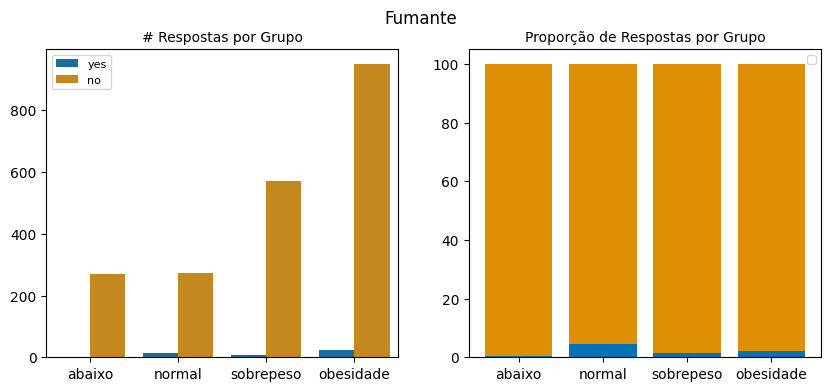

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Fumante')

sns.set_palette('colorblind')
sns.barplot(data = df_fuma, hue = 'fuma', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)

x = list(df_fuma['gp_obesidade'].unique())
y_no = df_fuma[df_fuma['fuma'] == 'no']['percentual'].values
y_yes = df_fuma[df_fuma['fuma'] == 'yes']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_yes)
plt.bar(x = x, height = y_no, bottom = y_yes)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

**Pontuando**<br>
O hábito de fumo não parece ser um fator associado a obesidade.

#####3.4.5 Monitora Consumo de Calorias

In [27]:
df_mc = df[['monit_cal', 'gp_obesidade']].drop_duplicates()
df_mc = df_mc.reset_index(drop = True)
df_mc['contagem'] = df_mc.apply(lambda x: df[(df.monit_cal == x.monit_cal) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_mc.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_mc[df_mc['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_mc['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_mc['ordem'] = df_mc.gp_obesidade.map(dicio_ordem)

df_mc = df_mc.sort_values(by = ['ordem', 'monit_cal'], ascending = [True, False])
df_mc = df_mc.reset_index(drop = True)

/tmp/ipython-input-28-2958150679.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


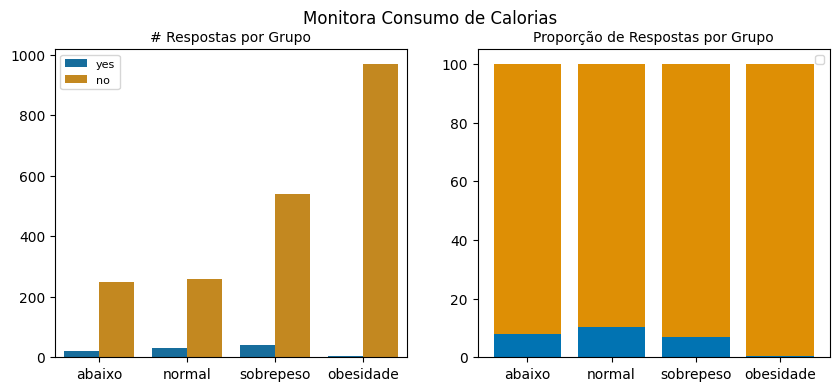

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Monitora Consumo de Calorias')

sns.set_palette('colorblind')
sns.barplot(data = df_mc, hue = 'monit_cal', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)

x = list(df_mc['gp_obesidade'].unique())
y_no = df_mc[df_mc['monit_cal'] == 'no']['percentual'].values
y_yes = df_mc[df_mc['monit_cal'] == 'yes']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_yes)
plt.bar(x = x, height = y_no, bottom = y_yes)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

**Pontuando**<br>Assim como o consumo de alimentos altamente calóricos, a frequência com que o monitoramento de consumo de calorias é parecido entre as classes, mas em sentido contrário. No caso, a classe "obesidade" é quem apresenta a menor ocorrência.

#####3.4.6 Consumo de Bebidas Alcóolicas

In [29]:
df_fca = df[['freq_cons_alcool', 'gp_obesidade']].drop_duplicates()
df_fca = df_fca.reset_index()
df_fca['contagem'] = df_fca.apply(lambda x: df[(df.freq_cons_alcool == x.freq_cons_alcool) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_fca.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_fca[df_fca['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_fca['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_fca['ordem'] = df_fca.gp_obesidade.map(dicio_ordem)

df_fca = df_fca.sort_values(by = ['ordem', 'freq_cons_alcool'], ascending = [True, False])
df_fca = df_fca.reset_index(drop = True)

/tmp/ipython-input-30-276113967.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


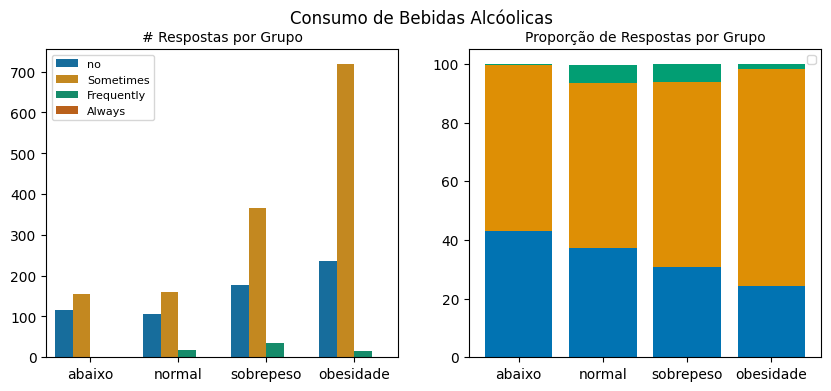

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Consumo de Bebidas Alcóolicas')

sns.set_palette('colorblind')
sns.barplot(data = df_fca, hue = 'freq_cons_alcool', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)


x = list(df_fca['gp_obesidade'].unique())
y_no = df_fca[df_fca['freq_cons_alcool'] == 'no']['percentual'].values
y_sometimes = df_fca[df_fca['freq_cons_alcool'] == 'Sometimes']['percentual'].values
y_freq = df_fca[df_fca['freq_cons_alcool'] == 'Frequently']['percentual'].values

sns.set_palette('colorblind')
plt.bar(x = x, height = y_no)
plt.bar(x = x, height = y_sometimes, bottom = y_no)
plt.bar(x = x, height = y_freq, bottom = y_no+y_sometimes)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

In [31]:
df_fca[df_fca['freq_cons_alcool'] == 'no'][['gp_obesidade', 'percentual']]

,gp_obesidade,percentual
0,abaixo,43.014706
3,normal,37.282230
7,sobrepeso,30.689655
10,obesidade,24.382716


**Pontuando**<br>O consumo de bebidas alcóolicas é crescente entre as classes, com a frequência de consumo na classe "obesidade" sendo a maior (75% bebe ao menos às vezes).

#####3.4.7 Consumo de Vegetais

<Figure size 800x400 with 0 Axes>

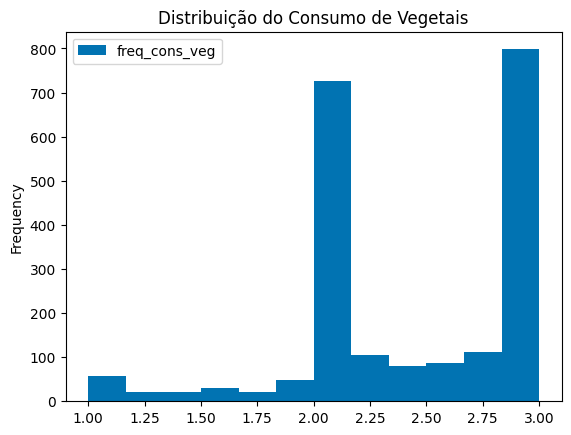

In [32]:
plt.figure(figsize=(8,4))
df.plot.hist(y = 'freq_cons_veg', bins = n_bins)
plt.title('Distribuição do Consumo de Vegetais')
plt.show()

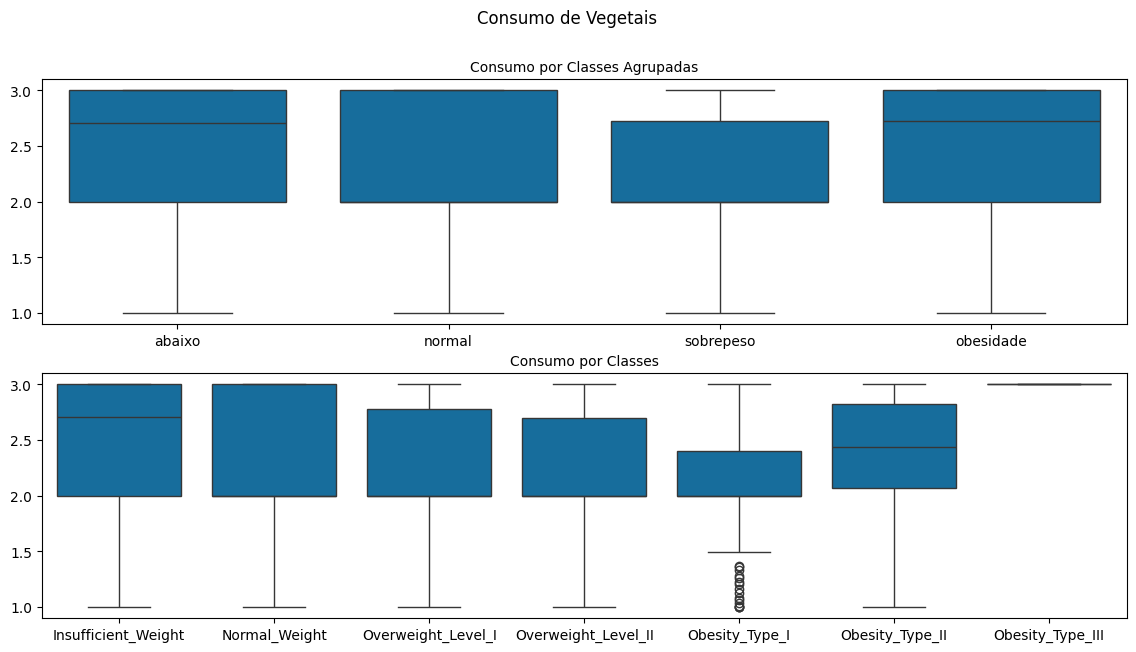

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(14,7))
fig.suptitle('Consumo de Vegetais')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'gp_obesidade', y = 'freq_cons_veg', ax = axs[0])
axs[0].set_title('Consumo por Classes Agrupadas', fontsize=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'obesidade', y = 'freq_cons_veg', ax = axs[1])
axs[1].set_title('Consumo por Classes', fontsize=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.show()

**Pontuando**<br>O consumo de vegetais não parece ser determinando para classificar um caso como obesidade, visto que a distribuição dos valores é próxima das demais classes, especialmente a de pessoas com peso abaixo do recomendado.

#####3.4.8 Número de Refeições Principais

<Figure size 800x400 with 0 Axes>

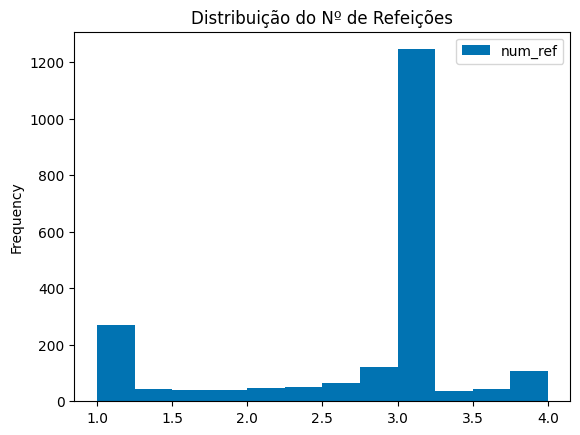

In [34]:
plt.figure(figsize=(8,4))
df.plot.hist(y = 'num_ref', bins = n_bins)
plt.title('Distribuição do Nº de Refeições')
plt.show()

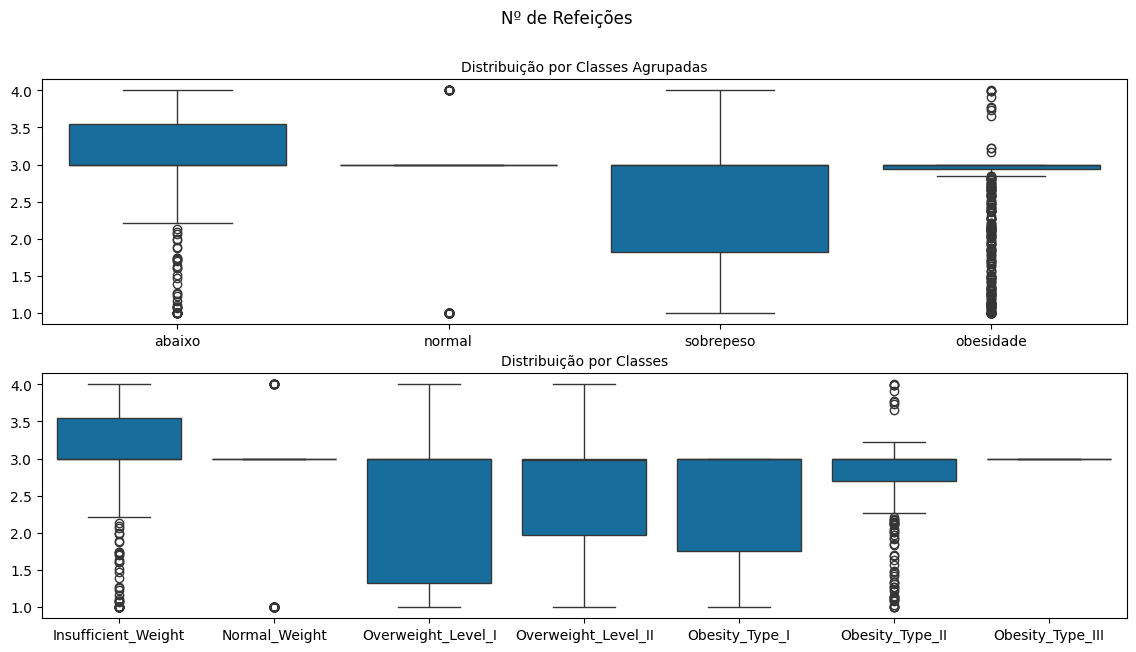

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(14,7))
fig.suptitle('Nº de Refeições')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'gp_obesidade', y = 'num_ref', ax = axs[0])
axs[0].set_title('Distribuição por Classes Agrupadas', fontsize=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'obesidade', y = 'num_ref', ax = axs[1])
axs[1].set_title('Distribuição por Classes', fontsize=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.show()

**Pontuando**<br>O número de refeições principais parece ter uma pequena redução quando comparadas as classes (abaixo e normal) e (sobrepeso e obesidade) nos limites das caixas (intervalo interquartil). Apesar disso, não parece ser possível confirmar um padrão para determinar a classe.

#####3.4.9 Consumo de Água

<Figure size 800x400 with 0 Axes>

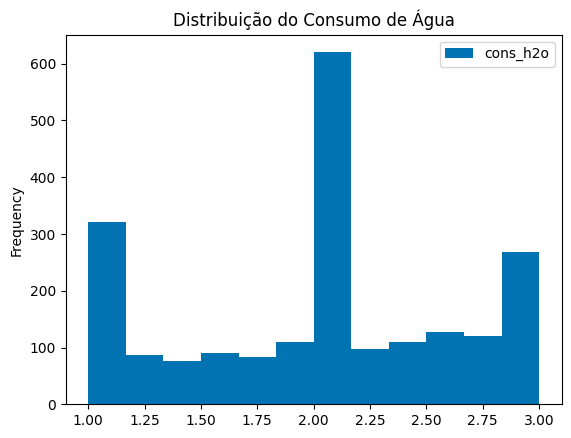

In [36]:
plt.figure(figsize=(8,4))
df.plot.hist(y = 'cons_h2o', bins = n_bins)
plt.title('Distribuição do Consumo de Água')
plt.show()

<font size=2>Os dados não seguem distribuição normal

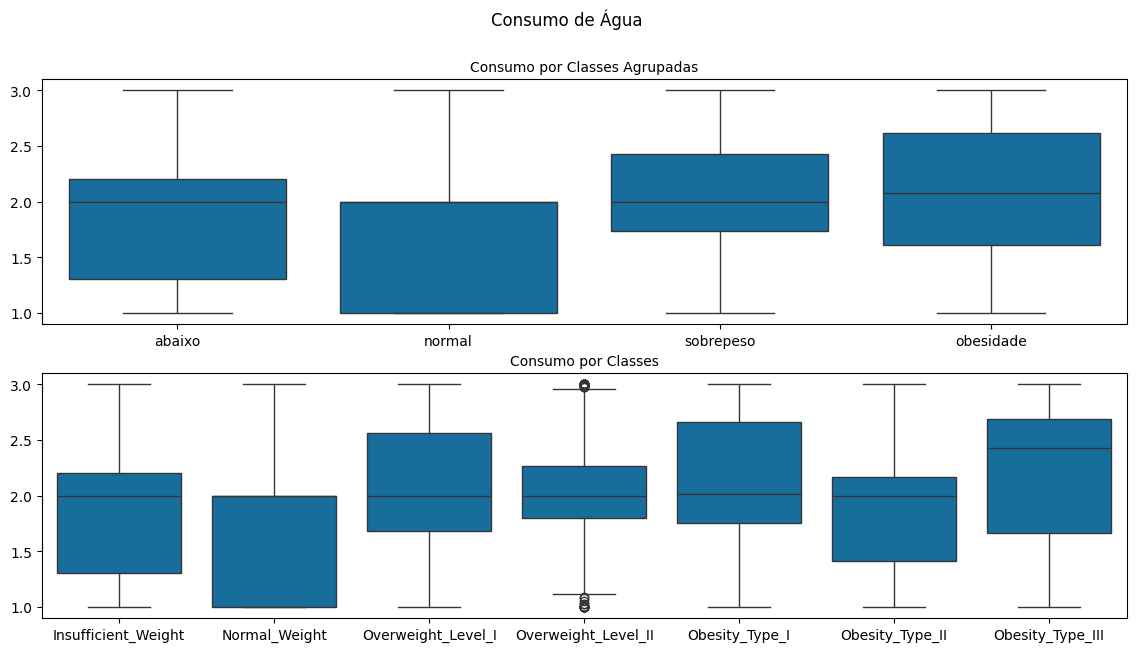

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(14,7))
fig.suptitle('Consumo de Água')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'gp_obesidade', y = 'cons_h2o', ax = axs[0])
axs[0].set_title('Consumo por Classes Agrupadas', fontsize=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'obesidade', y = 'cons_h2o', ax = axs[1])
axs[1].set_title('Consumo por Classes', fontsize=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.show()

**Pontuando**<br>
Observando as classes agrupadas, há uma tendência de aumento no consumo de água, principalmente observando os intervalos interquartis. Nas classes individuais, essa tendência é menos perceptível, mas ainda presente.

#### 3.5 Atividade Física

<Figure size 800x400 with 0 Axes>

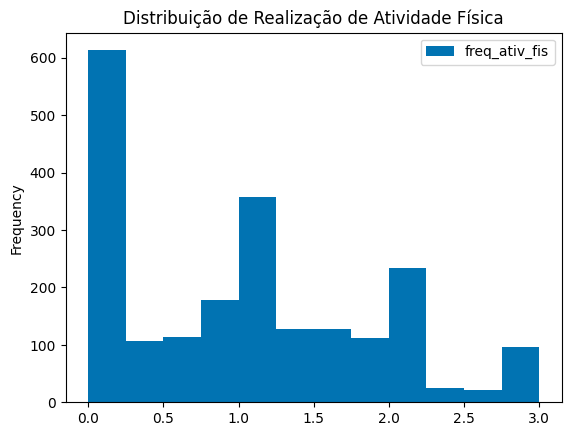

In [38]:
plt.figure(figsize=(8,4))
df.plot.hist(y = 'freq_ativ_fis', bins = n_bins)
plt.title('Distribuição de Realização de Atividade Física')
plt.show()

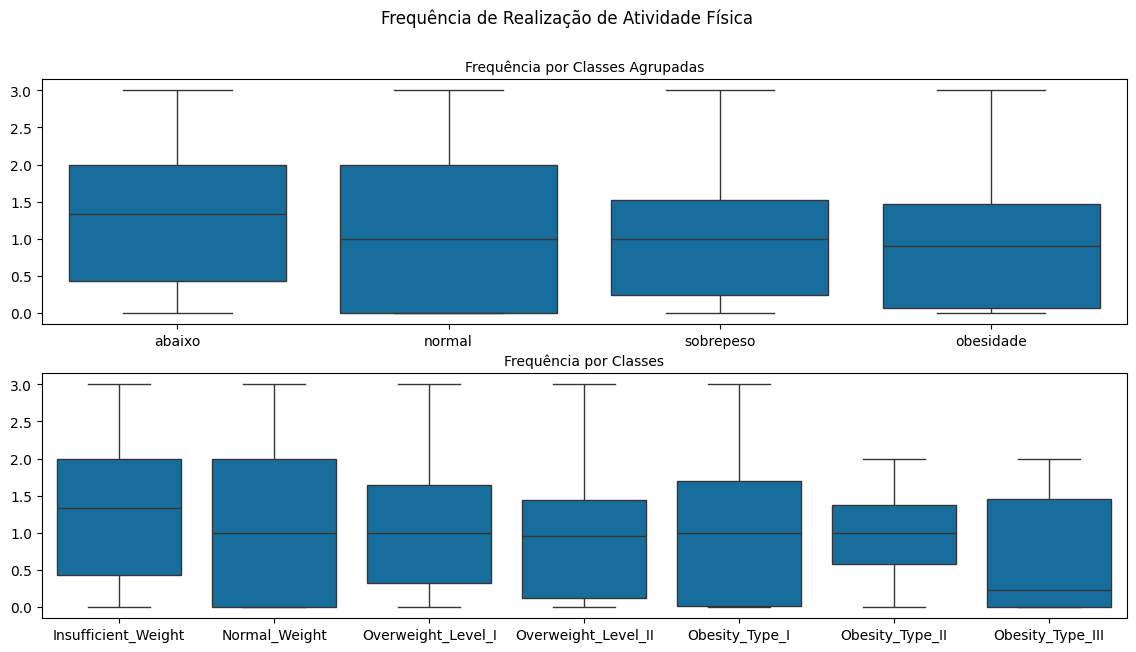

In [39]:
fig, axs = plt.subplots(2, 1, figsize=(14,7))
fig.suptitle('Frequência de Realização de Atividade Física')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'gp_obesidade', y = 'freq_ativ_fis', ax = axs[0])
axs[0].set_title('Frequência por Classes Agrupadas', fontsize=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'obesidade', y = 'freq_ativ_fis', ax = axs[1])
axs[1].set_title('Frequência por Classes', fontsize=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.show()

**Pontundo**<br>
A realização de atividade física parece reduzir com as classes.

####3.6 Tempo de Tela

<Figure size 800x400 with 0 Axes>

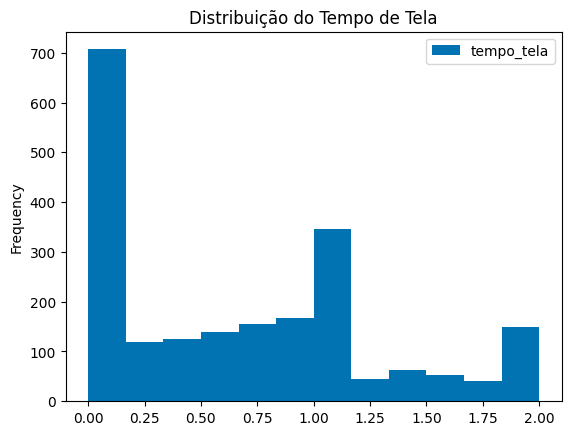

In [40]:
plt.figure(figsize=(8,4))
df.plot.hist(y = 'tempo_tela', bins = n_bins)
plt.title('Distribuição do Tempo de Tela')
plt.show()

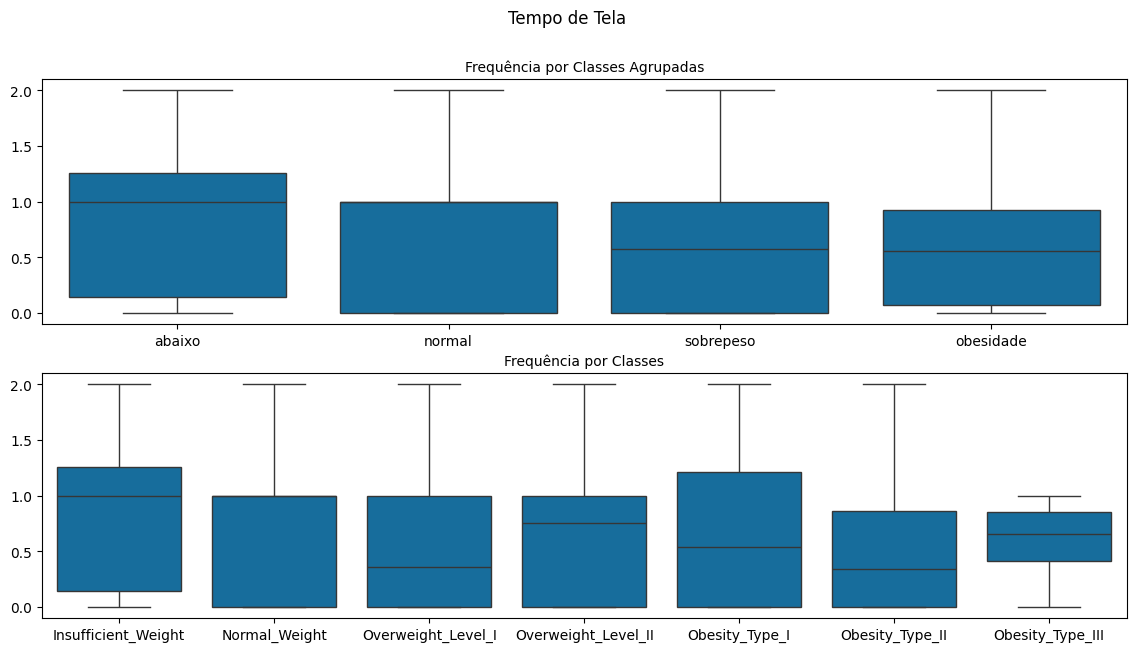

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(14,7))
fig.suptitle('Tempo de Tela')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'gp_obesidade', y = 'tempo_tela', ax = axs[0])
axs[0].set_title('Frequência por Classes Agrupadas', fontsize=10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.set_palette('colorblind')
sns.boxplot(data = df, x = 'obesidade', y = 'tempo_tela', ax = axs[1])
axs[1].set_title('Frequência por Classes', fontsize=10)
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.show()

####3.7 Meio de Transporte

In [42]:
df_mt = df[['meio_transp', 'gp_obesidade']].drop_duplicates()
df_mt = df_mt.reset_index()
df_mt['contagem'] = df_mt.apply(lambda x: df[(df.meio_transp == x.meio_transp) & (df.gp_obesidade == x.gp_obesidade)].shape[0], axis = 1)

lstDados = []
for i, row in df_mt.iterrows():
  cont = row.contagem
  gp = row.gp_obesidade
  total_gp = df_mt[df_mt['gp_obesidade'] == gp]['contagem'].sum()
  lstDados.append(cont / total_gp * 100)

df_mt['percentual'] = lstDados

dicio_ordem = {'abaixo': 1, 'normal': 2, 'sobrepeso': 3, 'obesidade': 4}
df_mt['ordem'] = df_mt.gp_obesidade.map(dicio_ordem)

df_mt = df_mt.sort_values(by = ['ordem', 'meio_transp'], ascending = [True, False])
df_mt = df_mt.reset_index(drop = True)

/tmp/ipython-input-43-966966055.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(fontsize = 8)


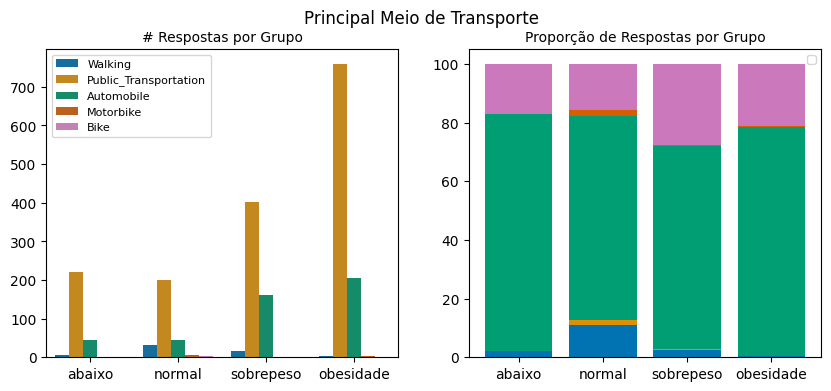

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Principal Meio de Transporte')

sns.set_palette('colorblind')
sns.barplot(data = df_mt, hue = 'meio_transp', y = 'contagem', x = 'gp_obesidade', ax = axs[0])
axs[0].set_title('# Respostas por Grupo', fontsize = 10)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend(fontsize = 8)


x = list(df_mt['gp_obesidade'].unique())
y_walk = df_mt[df_mt['meio_transp'] == 'Walking']['percentual'].values
y_bike = df_mt[df_mt['meio_transp'] == 'Bike']['percentual'].values
y_public = df_mt[df_mt['meio_transp'] == 'Public_Transportation']['percentual'].values
y_motorbike = df_mt[df_mt['meio_transp'] == 'Motorbike']['percentual'].values
y_auto = df_mt[df_mt['meio_transp'] == 'Automobile']['percentual'].values

zero_array = np.array([0.0])
y_bike = np.concatenate((zero_array, y_bike), axis = 0)
y_motorbike = np.concatenate((zero_array, y_motorbike), axis = 0)

sns.set_palette('colorblind')
plt.bar(x = x, height = y_walk)
plt.bar(x = x, height = y_bike, bottom = y_walk)
plt.bar(x = x, height = y_public, bottom = y_walk+y_bike)
plt.bar(x = x, height = y_motorbike, bottom = y_walk+y_bike+y_public)
plt.bar(x = x, height = y_auto, bottom = y_walk+y_bike+y_public+y_motorbike)

axs[1].set_title('Proporção de Respostas por Grupo', fontsize = 10)
axs[1].set_xlabel('')
axs[1].legend(fontsize = 8)

plt.show()

**Pontuando**<br>
No geral, o meio de transporte principal não parece ser uma boa forma de distinguir entre as classes.

####3.8 Correlação entre Variáveis

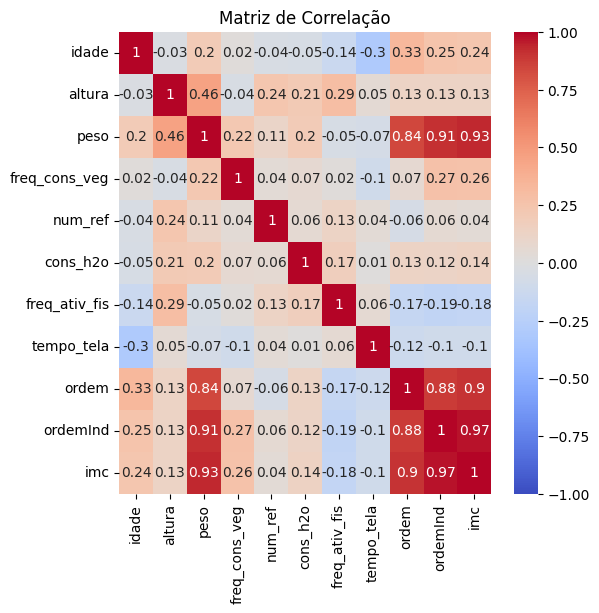

In [44]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True).round(2), annot = True, vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Matriz de Correlação')
plt.show()

**Pontuando**<br>
A única correlações mais significativa (valor absoluto > 0.7) é "imc" com "peso", o que faz sentido, pois o "imc" é calculado a partir do "peso" e tem relação diretamente proporcional.

##4. Modelagem

###4.1 Separação em Treino e Teste

In [45]:
# Selecionando as colunas com dados

lstColunasManter = [
    'genero',
    'idade',
    'altura',
    'peso',
    'imc',
    'hist_fam',
    'freq_cons_ali_alt_cal',
    'freq_cons_veg',
    'num_ref',
    'come_entre_ref',
    'fuma',
    'cons_h2o',
    'monit_cal',
    'freq_ativ_fis',
    'tempo_tela',
    'freq_cons_alcool',
    'meio_transp',
    'obesidade'
    ]

In [46]:
# Separando os conjuntos de treino e teste

y_gp = df['gp_obesidade']
df = df[lstColunasManter]

X, y = df.drop('obesidade', axis = 1), df['obesidade']
seed = 13

x_train, x_test, y_train, y_test = train_test_split(X, y_gp, random_state = seed, test_size = 0.25, stratify=y_gp)

# Separando os conjuntos por tipo de variável para tratamento

x_train_num = x_train.select_dtypes(include = ['int64', 'float64'])
x_test_num = x_test.select_dtypes(include = ['int64', 'float64'])
x_train_cat = x_train.select_dtypes(include = ['object'])
x_test_cat = x_test.select_dtypes(include = ['object'])

###4.2 Codificação (Encoding)

Vamos criar um DataFrame alternativo onde as colunas de texto (object) serão transformadas para o tipo numérico. Essa transformação pode ser necessária dependendo do modelo de ML a ser desenvolvido.
<br>
<br>Conforme visto na seção 2, as colunas de texto/categóricas são as seguintes:<br>
<br>

Coluna|Tipo|
---|---|
genero|binária|
hist_fam|binária|
freq_cons_ali_alt_cal|binária|
come_entre_ref|multi ordenada|
fuma|binária|
monit_cal|binária|
freq_cons_alcool|multi ordenada|
meio_transp|multi não ordenada|
obesidade|multi ordenada|
<br>

Tratando colunas com categorias binárias

In [47]:
# Transformação das colunas com categorias binárias > OneHotEncoder e BinaryEncoder
lstColunasBinarias = ['genero', 'hist_fam', 'freq_cons_ali_alt_cal', 'fuma', 'monit_cal']

for coluna in lstColunasBinarias:
  if coluna == 'genero':
    x_train_cat[coluna] = x_train_cat[coluna].map({'Male': 1, 'Female': 0})
    x_test_cat[coluna] = x_test_cat[coluna].map({'Male': 1, 'Female': 0})
  else:
    x_train_cat[coluna] = x_train_cat[coluna].map({'yes': 1, 'no': 0})
    x_test_cat[coluna] = x_test_cat[coluna].map({'yes': 1, 'no': 0})

# x_train_cat = pd.get_dummies(x_train_cat, prefix = lstColunasBinarias, columns = lstColunasBinarias)
# x_test_cat = pd.get_dummies(x_test_cat, prefix = lstColunasBinarias, columns = lstColunasBinarias)

Tratando colunas com multi categorias (+2)

In [48]:
dicioFreq = {
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
}

dicioTransp = {
    'Walking': 1,
    'Bike': 2,
    'Public_Transportation': 3,
    'Motorbike': 4,
    'Automobile': 5
}

# dicioObesidade = {
#     'Insufficient_Weight': 1,
#     'Normal_Weight': 2,
#     'Overweight_Level_I': 3,
#     'Overweight_Level_II': 4,
#     'Obesity_Type_I': 5,
#     'Obesity_Type_II': 6,
#     'Obesity_Type_III': 7
# }

x_train_cat['come_entre_ref'] = x_train_cat['come_entre_ref'].map(dicioFreq)
x_train_cat['freq_cons_alcool'] = x_train_cat['freq_cons_alcool'].map(dicioFreq)
x_train_cat['meio_transp'] = x_train_cat['meio_transp'].map(dicioTransp)
# x_train_cat['obesidade'] = x_train_cat['obesidade'].map(dicioObesidade)

x_test_cat['come_entre_ref'] = x_test_cat['come_entre_ref'].map(dicioFreq)
x_test_cat['freq_cons_alcool'] = x_test_cat['freq_cons_alcool'].map(dicioFreq)
x_test_cat['meio_transp'] = x_test_cat['meio_transp'].map(dicioTransp)
# x_test_cat['obesidade'] = x_test_cat['obesidade'].map(dicioObesidade)

###4.3 Normalização e Formação do Conjunto Final

In [49]:
# Normalizando com MinMaxScaler
scaler = MinMaxScaler().fit(x_train_num)
x_train_num_norm = pd.DataFrame(scaler.transform(x_train_num), columns = x_train_num.columns, index = x_train_num.index)
scaler = MinMaxScaler().fit(x_test_num)
x_test_num_norm = pd.DataFrame(scaler.transform(x_test_num), columns = x_test_num.columns, index = x_test_num.index)

In [ ]:
MinMaxScaler().fit_transform()

In [50]:
# Juntando (concatenando) os conjuntos antes separados
x_train_norm = pd.concat([x_train_num_norm, x_train_cat], axis=1)
x_test_norm = pd.concat([x_test_num_norm, x_test_cat], axis=1)

###4.4 Funções

In [51]:
def otimizaHiperpametros(model, params, x_train, y_train):

  grid = GridSearchCV(
      model,
      param_grid = params,
      cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 13)
      )

  grid.fit(x_train, y_train)

  print(f'Melhores Parâmatros: {grid.best_estimator_}')

  return grid.best_estimator_

In [52]:
# Acurácia: previsões corretas / total de previsões
# Precisão: TP / (TP + FP) > previsões corretas no grupo alvo / total de previsões do grupo alvo
# Recall: TP / (TP + FN) > previsões corretas no grupo alvo / total de casos do grupo alvo

def avaliaModelo(y_pred, y_test):

  acuracia = accuracy_score(y_test, y_pred)
  print(f'Acurácia: {np.round(acuracia*100,2)}%')
  score = f1_score(y_test, y_pred, average = 'weighted')
  print(f'f1_score: {np.round(score*100,2)}%')
  print(classification_report(y_test, y_pred))


###4.5 Modelos

#####4.5.1 KNN

In [53]:
%%time

knn_param_grid = {'n_neighbors': range(1, 20, 1)}

knn = KNeighborsClassifier()

knn_best_params = otimizaHiperpametros(knn, knn_param_grid, x_train_norm, y_train)

Melhores Parâmatros: KNeighborsClassifier(n_neighbors=1)
CPU times: user 1.08 s, sys: 6.89 ms, total: 1.09 s
Wall time: 1.11 s


In [54]:
%%time

knn = KNeighborsClassifier(n_neighbors = knn_best_params.n_neighbors).fit(x_train_norm, y_train)

y_pred_knn = knn.predict(x_test_norm)

avaliaModelo(y_pred_knn, y_test)

Acurácia: 85.8%
f1_score: 85.76%
              precision    recall  f1-score   support

      abaixo       0.82      0.91      0.86        68
      normal       0.67      0.60      0.63        72
   obesidade       0.96      0.90      0.93       243
   sobrepeso       0.80      0.89      0.84       145

    accuracy                           0.86       528
   macro avg       0.81      0.82      0.82       528
weighted avg       0.86      0.86      0.86       528

CPU times: user 45.8 ms, sys: 0 ns, total: 45.8 ms
Wall time: 47.3 ms


Na seção 3, vimos que as variáveis altura e peso (e imc, calculado a partir de ambas) parecem estar mais relacionadas à identificação de obesidade. Vamos testar um modelo apenas com essas duas variáveis na tentativa de ter um modelos possivelmente mais "clean" e com melhor poder de predição.

In [55]:
x_train_norm_filtrado = x_train_norm[['altura', 'peso']]
x_test_norm_filtrado = x_test_norm[['altura', 'peso']]

In [56]:
%%time

knn_param_grid = {'n_neighbors': range(1, 20, 1)}

knn = KNeighborsClassifier()

knn_best_params = otimizaHiperpametros(knn, knn_param_grid, x_train_norm_filtrado, y_train)

Melhores Parâmatros: KNeighborsClassifier(n_neighbors=1)
CPU times: user 808 ms, sys: 1.93 ms, total: 810 ms
Wall time: 810 ms


In [57]:
%%time

knn = KNeighborsClassifier(n_neighbors = knn_best_params.n_neighbors).fit(x_train_norm_filtrado, y_train)

y_pred_knn = knn.predict(x_test_norm_filtrado)

avaliaModelo(y_pred_knn, y_test)

Acurácia: 93.75%
f1_score: 93.65%
              precision    recall  f1-score   support

      abaixo       0.90      0.90      0.90        68
      normal       0.88      0.81      0.84        72
   obesidade       0.96      1.00      0.98       243
   sobrepeso       0.95      0.92      0.93       145

    accuracy                           0.94       528
   macro avg       0.92      0.90      0.91       528
weighted avg       0.94      0.94      0.94       528

CPU times: user 29.5 ms, sys: 1.97 ms, total: 31.4 ms
Wall time: 31.5 ms


A tentativa de ter um modelos mais simples, com menos variáveis preditoras, foi bem sucedido, pois obtivemos uma melhor performance!

Vamos a um útimo teste com o KNN, testar um modelo apenas com a variável imc.

In [58]:
x_train_imc = x_train[['imc']]
x_test_imc = x_test[['imc']]

In [59]:
%%time

knn_param_grid = {'n_neighbors': range(1, 30, 1)}

knn = KNeighborsClassifier()

knn_best_params = otimizaHiperpametros(knn, knn_param_grid, x_train_imc, y_train)

Melhores Parâmatros: KNeighborsClassifier(n_neighbors=14)
CPU times: user 1.13 s, sys: 4.01 ms, total: 1.13 s
Wall time: 1.13 s


In [60]:
%%time

knn = KNeighborsClassifier(n_neighbors = knn_best_params.n_neighbors).fit(x_train_imc, y_train)

y_pred_knn = knn.predict(x_test_imc)

avaliaModelo(y_pred_knn, y_test)

Acurácia: 97.73%
f1_score: 97.74%
              precision    recall  f1-score   support

      abaixo       0.94      0.99      0.96        68
      normal       0.91      0.94      0.93        72
   obesidade       1.00      1.00      1.00       243
   sobrepeso       1.00      0.95      0.98       145

    accuracy                           0.98       528
   macro avg       0.96      0.97      0.97       528
weighted avg       0.98      0.98      0.98       528

CPU times: user 39.2 ms, sys: 0 ns, total: 39.2 ms
Wall time: 42.5 ms


Utilizando apenas a variável imc, derivada da altura e peso, o desempenho foi bem próximo do anterior.

#####4.6 Decision Tree

Conjunto codificado e normalizado

In [61]:
%%time

tree_param_grid = {
    'max_depth': range(3, 6, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1)
}

tree = DecisionTreeClassifier(random_state = 13)

tree_best_params = otimizaHiperpametros(tree, tree_param_grid, x_train_norm, y_train)

Melhores Parâmatros: DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=13)
CPU times: user 13.3 s, sys: 53 ms, total: 13.4 s
Wall time: 15.9 s


In [62]:
%%time

tree = DecisionTreeClassifier(
    max_depth = tree_best_params.max_depth,
    min_samples_leaf = tree_best_params.min_samples_leaf,
    min_samples_split = tree_best_params.min_samples_split).fit(x_train_norm, y_train)

y_pred_tree = tree.predict(x_test_norm)

avaliaModelo(y_pred_tree, y_test)

Acurácia: 70.64%
f1_score: 71.7%
              precision    recall  f1-score   support

      abaixo       0.73      1.00      0.84        68
      normal       0.36      0.65      0.46        72
   obesidade       1.00      0.81      0.90       243
   sobrepeso       0.57      0.42      0.48       145

    accuracy                           0.71       528
   macro avg       0.67      0.72      0.67       528
weighted avg       0.76      0.71      0.72       528

CPU times: user 28.3 ms, sys: 1.01 ms, total: 29.3 ms
Wall time: 29 ms


Assim como fizemos para o KNN, vamos testar o desempenho do modelo de Árvore com um conjunto de teste simplificado, apenas com as colunas peso e altura.

In [63]:
%%time

tree_param_grid = {
    'max_depth': range(3, 6, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1)
}

tree = DecisionTreeClassifier(random_state = 13)

tree_best_params = otimizaHiperpametros(tree, tree_param_grid, x_train_norm_filtrado, y_train)

Melhores Parâmatros: DecisionTreeClassifier(max_depth=5, min_samples_split=8, random_state=13)
CPU times: user 8.41 s, sys: 32.8 ms, total: 8.45 s
Wall time: 8.55 s


In [64]:
%%time

tree = DecisionTreeClassifier(
    max_depth = tree_best_params.max_depth,
    min_samples_leaf = tree_best_params.min_samples_leaf,
    min_samples_split = tree_best_params.min_samples_split).fit(x_train_norm_filtrado, y_train)

y_pred_tree = tree.predict(x_test_norm_filtrado)

avaliaModelo(y_pred_tree, y_test)

Acurácia: 86.36%
f1_score: 85.63%
              precision    recall  f1-score   support

      abaixo       0.88      0.85      0.87        68
      normal       0.76      0.51      0.61        72
   obesidade       0.91      1.00      0.95       243
   sobrepeso       0.81      0.82      0.82       145

    accuracy                           0.86       528
   macro avg       0.84      0.80      0.81       528
weighted avg       0.86      0.86      0.86       528

CPU times: user 27.7 ms, sys: 0 ns, total: 27.7 ms
Wall time: 26.9 ms


Ao contrário do KNN, o modelo de Árvore teve uma piora na performance.

Vamos a um segundo teste: usar o conjunto de treino sem normalização, mas ainda trabalhando apenas com as colunas peso e altura.

In [65]:
x_train_filtrado = x_train[['peso', 'altura']]
x_test_filtrado = x_test[['peso', 'altura']]

In [66]:
%%time

tree_param_grid = {
    'max_depth': range(3, 6, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1)
}

tree = DecisionTreeClassifier(random_state = 13)

tree_best_params = otimizaHiperpametros(tree, tree_param_grid, x_train_filtrado, y_train)

Melhores Parâmatros: DecisionTreeClassifier(max_depth=5, min_samples_split=8, random_state=13)
CPU times: user 8.47 s, sys: 37.7 ms, total: 8.5 s
Wall time: 8.57 s


In [67]:
%%time

tree = DecisionTreeClassifier(
    max_depth = tree_best_params.max_depth,
    min_samples_leaf = tree_best_params.min_samples_leaf,
    min_samples_split = tree_best_params.min_samples_split).fit(x_train_filtrado, y_train)

y_pred_tree = tree.predict(x_test_filtrado)

avaliaModelo(y_pred_tree, y_test)

Acurácia: 88.64%
f1_score: 88.18%
              precision    recall  f1-score   support

      abaixo       0.92      0.96      0.94        68
      normal       0.87      0.62      0.73        72
   obesidade       0.91      0.99      0.95       243
   sobrepeso       0.83      0.81      0.82       145

    accuracy                           0.89       528
   macro avg       0.88      0.85      0.86       528
weighted avg       0.88      0.89      0.88       528

CPU times: user 27.5 ms, sys: 21 µs, total: 27.5 ms
Wall time: 27.3 ms


Novamente, o desempenho não foi bom. Por último, vamos usar apenas a variável imc, já que vimos que os limites entre os grupos (variável alvo agrupada) responde ao imc.

In [68]:
%%time

tree_param_grid = {
    'max_depth': range(2, 6, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1)
}

tree = DecisionTreeClassifier(random_state = 13)

tree_best_params = otimizaHiperpametros(tree, tree_param_grid, x_train_imc, y_train)

Melhores Parâmatros: DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=9,
                       random_state=13)
CPU times: user 9.45 s, sys: 39 ms, total: 9.48 s
Wall time: 9.53 s


In [69]:
%%time

tree = DecisionTreeClassifier(
    max_depth = tree_best_params.max_depth,
    min_samples_leaf = tree_best_params.min_samples_leaf,
    min_samples_split = tree_best_params.min_samples_split).fit(x_train_imc, y_train)

y_pred_tree = tree.predict(x_test_imc)

avaliaModelo(y_pred_tree, y_test)

Acurácia: 97.54%
f1_score: 97.56%
              precision    recall  f1-score   support

      abaixo       1.00      0.96      0.98        68
      normal       0.90      1.00      0.95        72
   obesidade       1.00      0.98      0.99       243
   sobrepeso       0.97      0.96      0.97       145

    accuracy                           0.98       528
   macro avg       0.97      0.97      0.97       528
weighted avg       0.98      0.98      0.98       528

CPU times: user 26.8 ms, sys: 785 µs, total: 27.6 ms
Wall time: 27 ms


Utilizando apenas o imc, o desempenho foi melhor do que os testes anteriores para o mesmo modelo, e está no mesmo patamar do modelo KNN.

##5. Conclusão

O objetivo de desenvolver um modelo de classificação para predição de casos de obesidade foi alcançado com ambos os modelos desenvolvidos (KNN e Árvore de Decisão). Apesar dos modelos alcançarem desempenho semelhante nos testes, com métricas acima de 90%, pode-se destacar o modelo KNN como melhor, pois demanda menos processamento - é mais simples que a Árvore de Decisão e performou tão bem quanto.

Entre as variáveis preditoras, aquelas com maior poder preditivo foram "peso" e "altura", assim como a variável "imc", calculada a partir delas.

Durante a etapa de exploração, outras variáveis pareceram ter alguma relação com quadro de obesidade, seja de forma proporcional ou inversamente proporcional. No entanto, o poder preditor delas parece não ser significativo. Talvez, se o projeto fosse para predição binária "obeso ou não obeso", essas variáveis tivessem um poder de predição maior.